In [14]:
from matplotlib import pyplot as plt
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from keras.wrappers.scikit_learn import KerasClassifier


In [15]:
input_file = 'train.csv'
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 
           'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
           'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 
           'wifi', 'price_range', 'id']

# Load the data
df = pd.read_csv(input_file)

In [16]:
# normalizing min max
# x_train = preprocessing.normalize(df)
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
x = df.loc[:, features].values
y = df.loc[:, target].values

# Normalize the data

# Min Max
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
# normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)

# Z-Score
x_zscore = StandardScaler().fit_transform(x)
normalized_zscore = pd.DataFrame(x_zscore, columns = features)
# normalized_zscore = pd.concat([normalized_zscore, df[[target]]], axis = 1)


Artificial Neural Network - Min Max - Holdout
19/19 [==============================] - 0s 4ms/step


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


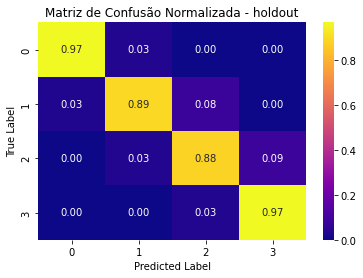

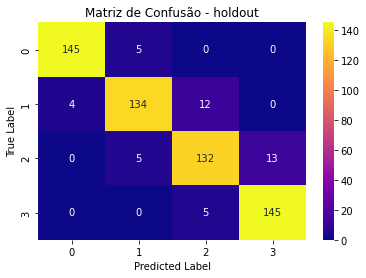

Accuracy: 0.9266666666666666
F1 Score: 0.9264914691933325
Precision: 0.9268343693068654
Recall: 0.9266666666666666
Specificity: 0.9266666666666666
Artificial Neural Network - Min Max - Cross Validation


C:\Users\raulp\AppData\Local\Temp/ipykernel_31668/613286201.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=lambda: create_model(normalized_data.shape[1], labels_categorical.shape[1]), epochs=50, batch_size=10, verbose=0)


7/7 [==============================] - 0s 1ms/step


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


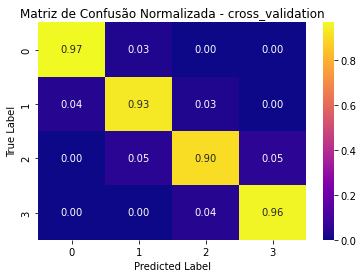

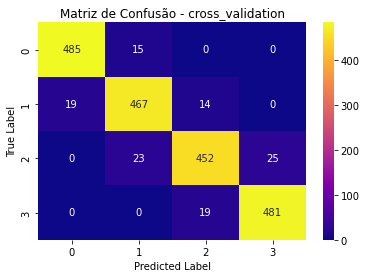

Accuracy: 0.9425
F1 Score: 0.9423794037268554
Precision: 0.942401427702801
Recall: 0.9424999999999999
Specificity: 0.9424999999999999
Artificial Neural Network - Z-Score
19/19 [==============================] - 0s 1ms/step


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


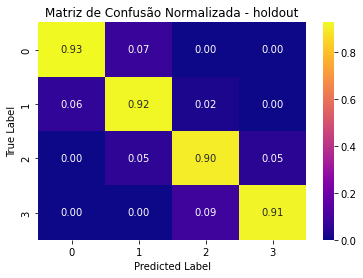

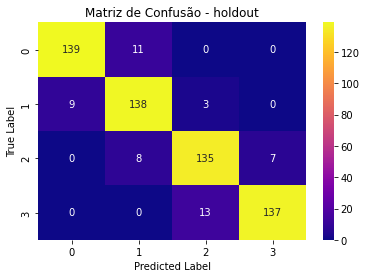

Accuracy: 0.915
F1 Score: 0.9152228658090636
Precision: 0.9158996762242902
Recall: 0.915
Specificity: 0.915
Artificial Neural Network - Z-Score - Cross Validation


C:\Users\raulp\AppData\Local\Temp/ipykernel_31668/613286201.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=lambda: create_model(normalized_data.shape[1], labels_categorical.shape[1]), epochs=50, batch_size=10, verbose=0)


7/7 [==============================] - 0s 1ms/step


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


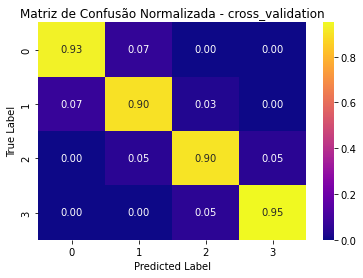

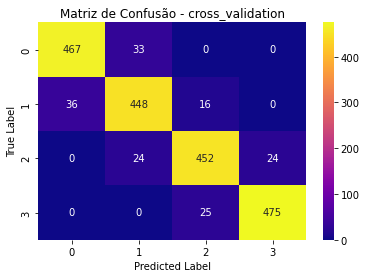

Accuracy: 0.921
F1 Score: 0.9210180571558493
Precision: 0.9210744109357305
Recall: 0.921
Specificity: 0.921


In [24]:

# Definição do modelo para o KerasClassifier
def create_model(input_dim, num_classes):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def apply_artificial_neural_network(normalized_data, labels, features, type_split, show_metrics=True, normalized_conf_matrix=True):
    labels_categorical = to_categorical(labels)
    
    if type_split == 'holdout':
        # Divisão dos dados em treino e teste
        x_train, x_test, y_train, y_test = train_test_split(normalized_data, labels_categorical, test_size=0.3, random_state=0, stratify=labels)
        model = create_model(x_train.shape[1], y_train.shape[1])
        model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=0)
        
        # Previsões e avaliação
        y_pred = model.predict(x_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)

    elif type_split == 'cross_validation':
        model = KerasClassifier(build_fn=lambda: create_model(normalized_data.shape[1], labels_categorical.shape[1]), epochs=50, batch_size=10, verbose=0)
        sk_folds = StratifiedKFold(n_splits=10)
        y_pred_cv = cross_val_predict(model, normalized_data, labels, cv=sk_folds)
        
        # Avaliação
        y_pred_classes = y_pred_cv
        y_test_classes = labels

    # Métricas
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='macro')
    recall = recall_score(y_test_classes, y_pred_classes, average='macro')
    f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
    specificity = recall_score(y_test_classes, y_pred_classes, average='macro', pos_label=0, labels=[0, 1, 2, 3])
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

    # Exibição de métricas e matriz de confusão
    if show_metrics:
        if normalized_conf_matrix:
            cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
            sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='plasma')
            plt.title('Matriz de Confusão Normalizada - ' + type_split)   
        else:
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='plasma')
            plt.title('Matriz de Confusão - ' + type_split)   
        
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
        if not normalized_conf_matrix:
            cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
            sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='plasma')
            plt.title('Matriz de Confusão Normalizada - ' + type_split)   
        else:
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='plasma')
            plt.title('Matriz de Confusão - ' + type_split)   
        
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
        print('Accuracy:', accuracy)
        print('F1 Score:', f1)
        print('Precision:', precision)
        print('Recall:', recall)
        print('Specificity:', specificity)
        
print('Artificial Neural Network - Min Max - Holdout')
apply_artificial_neural_network(normalized_minmax, y, features, 'holdout')
print('Artificial Neural Network - Min Max - Cross Validation')
apply_artificial_neural_network(normalized_minmax, y, features, 'cross_validation')
print('Artificial Neural Network - Z-Score')
apply_artificial_neural_network(normalized_zscore, y, features, 'holdout')
print('Artificial Neural Network - Z-Score - Cross Validation')
apply_artificial_neural_network(normalized_zscore, y, features, 'cross_validation')

In [18]:
def apply_artificial_neural_network(normalized_data,labels, feature, type_split, show_metrics=True, normalized_conf_matrix=True):
    # Dividir os rótulos em categorias
    labels_categorical = to_categorical(labels)
    
    if type_split == 'holdout':
        # Divisão dos dados em treino e teste
        x_train, x_test, y_train, y_test = train_test_split(normalized_data, labels_categorical, test_size=0.3, random_state=0, stratify=labels)
        
        # Construir e treinar o modelo
        model = Sequential([
            Dense(64, input_dim=x_train.shape[1], activation='relu'),
            Dense(32, activation='relu'),
            Dense(labels_categorical.shape[1], activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=0)
        
        # Prever os resultados para o conjunto de teste
        y_pred = model.predict(x_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)
        
    elif type_split == 'cross_validation':
        model = Sequential([
            Dense(64, input_dim=normalized_data.shape[1], activation='relu'),
            Dense(32, activation='relu'),
            Dense(labels_categorical.shape[1], activation='softmax')
        ])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Validacao cruzada
        sk_folds = StratifiedKFold(n_splits=10)
        y_pred_cv = cross_val_predict(model, normalized_data, labels, cv=sk_folds, method="predict")
        y_pred_classes = np.argmax(y_pred_cv, axis=1)
        y_test_classes = labels  # Em validação cruzada, comparamos contra todos os labels originais
        
    # Calcular métricas
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='macro')
    recall = recall_score(y_test_classes, y_pred_classes, average='macro')
    f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

    # Exibir métricas e matriz de confusão
    if show_metrics:
        if normalized_conf_matrix:
            cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
            sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
        else:
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
        
        plt.title('Confusion Matrix - ' + type_split)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
        print('Accuracy:', accuracy)
        print('Precision:', precision)
        print('Recall:', recall)
        print('F1 Score:', f1)

# Uso da função com dados normalizados
# print('Artificial Neural Network - Min Max - Holdout')
# apply_artificial_neural_network(normalized_minmax, y, features, 'holdout')
# print('Artificial Neural Network - Min Max - Cross Validation')
# apply_artificial_neural_network(normalized_minmax, y, features, 'cross_validation')
# print('Artificial Neural Network - Z-Score')
# apply_artificial_neural_network(normalized_zscore, y, features, 'holdout')
# apply_artificial_neural_network(normalized_zscore, y, features, 'cross_validation')